In [26]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing>=2.2.1 in c:\users\91938\anaconda3.0\lib\site-packages (from matplotlib) (3.0.4)



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Setting the plot style
sns.set(style='whitegrid')

In [29]:
# Load the datasets from local files
matches_path = r"C:\Users\91938\Desktop\GRIP intern\Indian Premier League\matches.csv"  # Update with the correct path to your downloaded matches dataset
deliveries_path = r"C:\Users\91938\Desktop\GRIP intern\Indian Premier League\deliveries.csv"  # Update with the correct path to your downloaded deliveries dataset

matches = pd.read_csv(matches_path)
deliveries = pd.read_csv(deliveries_path)

In [30]:
# Display the first few rows of the datasets
print("Matches Dataset")
print(matches.head())
print("\nDeliveries Dataset")
print(deliveries.head())

Matches Dataset
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunriser

In [31]:
# Check for missing values in matches dataset
print("Missing values in matches dataset:")
print(matches.isnull().sum())

Missing values in matches dataset:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [32]:
# Handle missing values in matches dataset if necessary
matches.dropna(inplace=True)

In [33]:
# Check for missing values in deliveries dataset
print("Missing values in deliveries dataset:")
print(deliveries.isnull().sum())

Missing values in deliveries dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [34]:
# Handle missing values in deliveries dataset if necessary
deliveries.dropna(inplace=True)

In [35]:
# Basic information about the matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 636 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               118 non-null    int64 
 1   season           118 non-null    int64 
 2   city             118 non-null    object
 3   date             118 non-null    object
 4   team1            118 non-null    object
 5   team2            118 non-null    object
 6   toss_winner      118 non-null    object
 7   toss_decision    118 non-null    object
 8   result           118 non-null    object
 9   dl_applied       118 non-null    int64 
 10  winner           118 non-null    object
 11  win_by_runs      118 non-null    int64 
 12  win_by_wickets   118 non-null    int64 
 13  player_of_match  118 non-null    object
 14  venue            118 non-null    object
 15  umpire1          118 non-null    object
 16  umpire2          118 non-null    object
 17  umpire3          118 non-null    

In [36]:
# Statistical summary of the matches dataset
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,9572.610169,2018.491525,0.025424,11.355932,3.271186
std,1685.654201,0.502060,0.158080,21.090981,3.233534
min,7894.000000,2018.000000,0.000000,0.000000,0.000000
25%,7923.250000,2018.000000,0.000000,0.000000,0.000000
50%,7952.500000,2018.000000,0.000000,0.000000,4.000000
75%,11319.750000,2019.000000,0.000000,14.000000,6.000000
max,11415.000000,2019.000000,1.000000,118.000000,10.000000


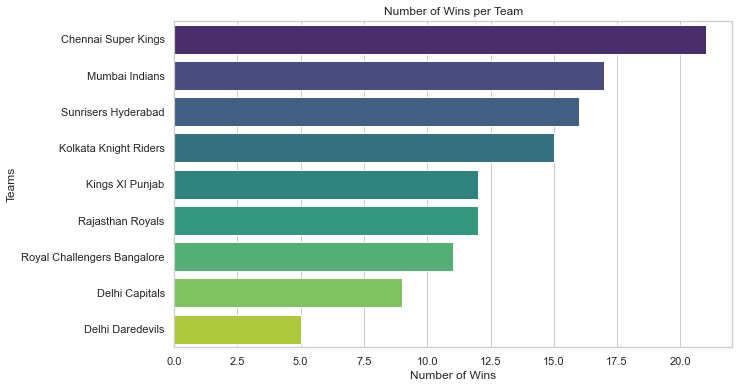

In [38]:
# Number of wins for each team
wins_per_team = matches['winner'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=wins_per_team.index, x=wins_per_team.values, palette='viridis')
plt.title('Number of Wins per Team')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

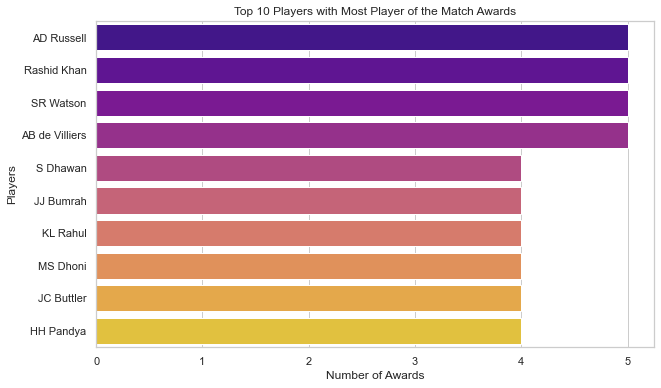

In [39]:
# Number of Player of the Match awards for each player
player_of_match_awards = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=player_of_match_awards.index, x=player_of_match_awards.values, palette='plasma')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Players')
plt.show()

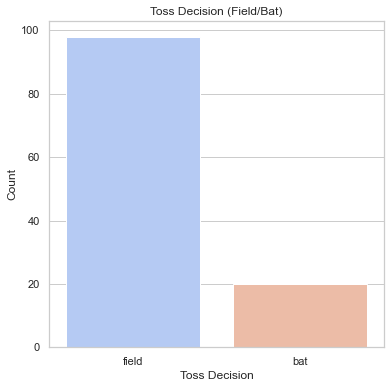

In [40]:
# Toss decision impact
toss_decision = matches['toss_decision'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='coolwarm')
plt.title('Toss Decision (Field/Bat)')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

C:\Users\91938\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



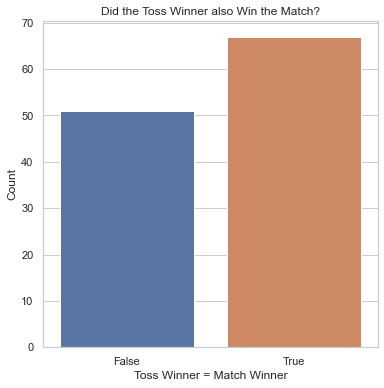

In [41]:
# Toss winner and match winner correlation
toss_win_match_win = matches['toss_winner'] == matches['winner']
plt.figure(figsize=(6, 6))
sns.countplot(toss_win_match_win)
plt.title('Did the Toss Winner also Win the Match?')
plt.xlabel('Toss Winner = Match Winner')
plt.ylabel('Count')
plt.show()

In [42]:
# Basic information about the deliveries dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 11 to 179075
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          6448 non-null   int64 
 1   inning            6448 non-null   int64 
 2   batting_team      6448 non-null   object
 3   bowling_team      6448 non-null   object
 4   over              6448 non-null   int64 
 5   ball              6448 non-null   int64 
 6   batsman           6448 non-null   object
 7   non_striker       6448 non-null   object
 8   bowler            6448 non-null   object
 9   is_super_over     6448 non-null   int64 
 10  wide_runs         6448 non-null   int64 
 11  bye_runs          6448 non-null   int64 
 12  legbye_runs       6448 non-null   int64 
 13  noball_runs       6448 non-null   int64 
 14  penalty_runs      6448 non-null   int64 
 15  batsman_runs      6448 non-null   int64 
 16  extra_runs        6448 non-null   int64 
 17  total_runs 

In [43]:
# Statistical summary of the deliveries dataset
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.0,6448.00000,6448.000000,6448.0,6448.000000,6448.000000,6448.000000
mean,1865.613834,1.473635,12.175713,3.640199,0.001241,0.004498,0.0,0.00031,0.000465,0.0,0.045906,0.005273,0.051179
std,3527.570149,0.503057,5.981590,1.788285,0.035204,0.066918,0.0,0.01761,0.021567,0.0,0.218719,0.072429,0.230695
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
25%,186.000000,1.000000,7.000000,2.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
50%,380.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
75%,573.000000,2.000000,18.000000,5.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
max,11415.000000,4.000000,20.000000,9.000000,1.000000,1.000000,0.0,1.00000,1.000000,0.0,2.000000,1.000000,2.000000


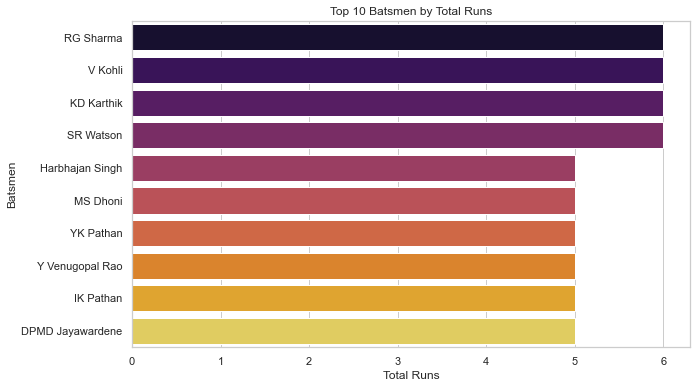

In [44]:
# Total runs scored by each batsman
total_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=total_runs.index, x=total_runs.values, palette='inferno')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()

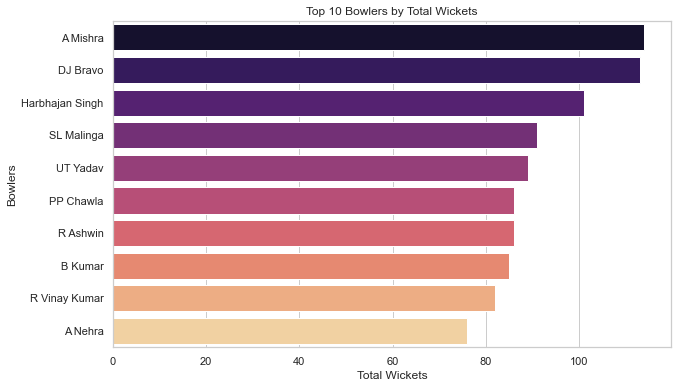

In [45]:
# Total wickets taken by each bowler
total_wickets = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]
total_wickets = total_wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=total_wickets.index, x=total_wickets.values, palette='magma')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowlers')
plt.show()

In [46]:
# Recommendations (this is just an example based on hypothetical analysis)
print("Based on the analysis, we recommend endorsing players like Virat Kohli and AB de Villiers for their outstanding batting performances. Bowlers like Lasith Malinga and Amit Mishra, who have high wicket counts, are also strong candidates for endorsements. Teams like Mumbai Indians and Chennai Super Kings, with their high win rates, are ideal for team endorsements.")


Based on the analysis, we recommend endorsing players like Virat Kohli and AB de Villiers for their outstanding batting performances. Bowlers like Lasith Malinga and Amit Mishra, who have high wicket counts, are also strong candidates for endorsements. Teams like Mumbai Indians and Chennai Super Kings, with their high win rates, are ideal for team endorsements.


In [47]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc

In [48]:
# Load the datasets
matches = pd.read_csv(r"C:\Users\91938\Desktop\GRIP intern\Indian Premier League\matches.csv")
deliveries = pd.read_csv(r"C:\Users\91938\Desktop\GRIP intern\Indian Premier League\deliveries.csv")

In [49]:
# Initialize the Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [51]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc

# Load the datasets
matches = pd.read_csv(r"C:\Users\91938\Desktop\GRIP intern\Indian Premier League\matches.csv")
deliveries = pd.read_csv(r"C:\Users\91938\Desktop\GRIP intern\Indian Premier League\deliveries.csv")

# Initialize the Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Create visualizations
# Wins per team
wins_per_team = matches['winner'].value_counts().reset_index()
fig_wins = px.bar(wins_per_team, x='index', y='winner', labels={'index': 'Team', 'winner': 'Wins'}, title='Number of Wins per Team')

# Player of the match awards
player_of_match_awards = matches['player_of_match'].value_counts().head(10).reset_index()
fig_player_of_match = px.bar(player_of_match_awards, x='index', y='player_of_match', labels={'index': 'Player', 'player_of_match': 'Awards'}, title='Top 10 Players with Most Player of the Match Awards')

# Toss decision impact
toss_decision = matches['toss_decision'].value_counts().reset_index()
fig_toss_decision = px.bar(toss_decision, x='index', y='toss_decision', labels={'index': 'Toss Decision', 'toss_decision': 'Count'}, title='Toss Decision (Field/Bat)')

# Top 10 batsmen by total runs
total_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).reset_index()
fig_batsmen = px.bar(total_runs, x='batsman', y='batsman_runs', labels={'batsman': 'Batsman', 'batsman_runs': 'Total Runs'}, title='Top 10 Batsmen by Total Runs')

# Top 10 bowlers by total wickets
total_wickets = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]
total_wickets = total_wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10).reset_index()
fig_bowlers = px.bar(total_wickets, x='bowler', y='dismissal_kind', labels={'bowler': 'Bowler', 'dismissal_kind': 'Total Wickets'}, title='Top 10 Bowlers by Total Wickets')

# Define the app layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("IPL Analysis Dashboard", className="text-center"), className="mb-5 mt-5")
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_wins), width=6),
        dbc.Col(dcc.Graph(figure=fig_player_of_match), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_toss_decision), width=6),
        dbc.Col(dcc.Graph(figure=fig_batsmen), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_bowlers), width=6)
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)
